<a href="https://colab.research.google.com/github/dinianggraini13/SKRIPSI-FIX-FIX/blob/main/Labeling%20%26%20Visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "gdrive/MyDrive/"

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('hasilreviews.csv')

In [ ]:
df.head

<bound method NDFrame.head of                                                  content  score
0      I literally can't use the app. It won't let me...      1
1      The platform has potential, but the app, which...      3
2      Pretty good for a first launch!! Its easy to u...      3
3      Currently, it's very challenging to use. It's ...      2
4      Meh. Not the greatest experience on a Chromebo...      2
...                                                  ...    ...
33464             Twitter is better then this copied app      1
33465                                         Cheap copy      1
33466  App some Designs copied from Twitter ... I thi...      1
33467                                                 Ok      5
33468                  T don't like very so the nice 👍🏻❤      1

[33469 rows x 2 columns]>

LABELING

In [ ]:
# Membuat kolom baru 'label' berdasarkan nilai score
df['label'] = df['score'].apply(lambda x: 'positif' if x in [4, 5] else ('netral' if x == 3 else 'negatif'))

# Menampilkan hasil
print(df.head())

                                             content  score    label
0  I literally can't use the app. It won't let me...      1  negatif
1  The platform has potential, but the app, which...      3   netral
2  Pretty good for a first launch!! Its easy to u...      3   netral
3  Currently, it's very challenging to use. It's ...      2  negatif
4  Meh. Not the greatest experience on a Chromebo...      2  negatif


In [ ]:
# Hanya menyimpan kolom 'label' dan 'content'
df = df[['content', 'label']]

df.head()

,content,label
0,I literally can't use the app. It won't let me...,negatif
1,"The platform has potential, but the app, which...",netral
2,Pretty good for a first launch!! Its easy to u...,netral
3,"Currently, it's very challenging to use. It's ...",negatif
4,Meh. Not the greatest experience on a Chromebo...,negatif


In [ ]:
# Menghitung total masing-masing label

df.label.value_counts()

negatif    15703
positif    14758
netral      3008
Name: label, dtype: int64

In [ ]:
# Membuat kode unik dari kolom label

possible_labels = df.label.unique()

In [ ]:
# Mengonversi label ke kelas index

label_dict = {}
for index, possible_label in enumerate(possible_labels):
  label_dict[possible_label] = index

In [ ]:
df['label'] = df.label.replace(label_dict)

<ipython-input-10-2708a7fa7e7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df.label.replace(label_dict)


In [ ]:
df.head()

,content,label
0,I literally can't use the app. It won't let me...,0
1,"The platform has potential, but the app, which...",1
2,Pretty good for a first launch!! Its easy to u...,1
3,"Currently, it's very challenging to use. It's ...",0
4,Meh. Not the greatest experience on a Chromebo...,0


### **VISUALISASI WORDCLOUD**

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
# Menyimpan dataset yang telah dilabeli
df.to_csv('hasilreviews_label.csv', index=False)  # Ganti 'hasilreviews_labeled.csv' dengan nama file keluaran yang diinginkan

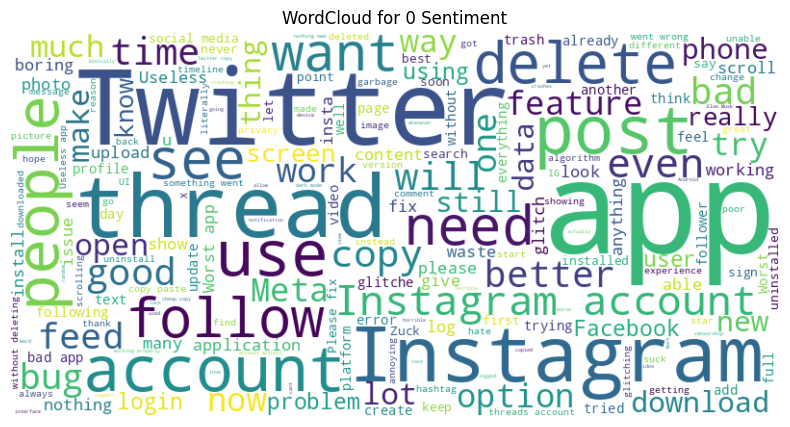

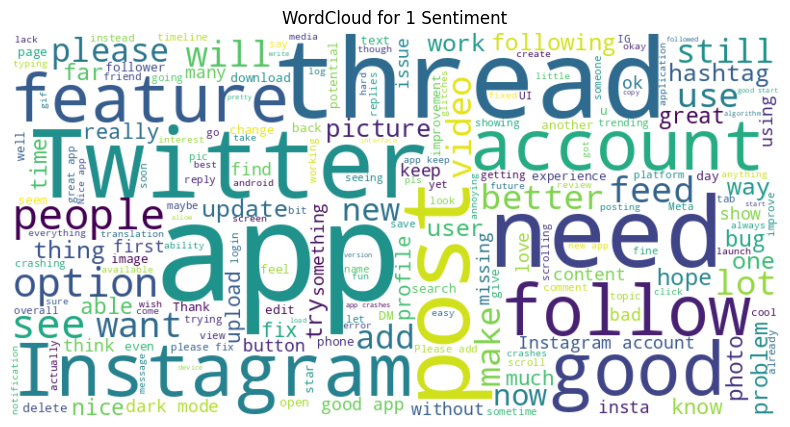

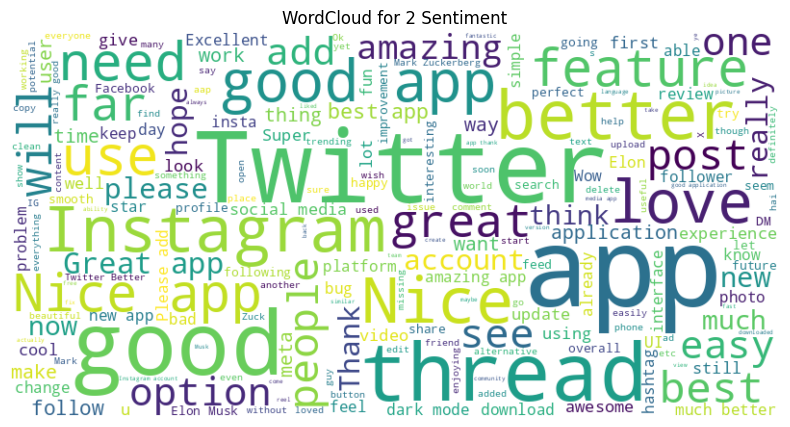

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat dan menampilkan WordCloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat WordCloud untuk setiap label
for label in df['label'].unique():
    text_for_label = " ".join(df[df['label'] == label]['content'])
    generate_wordcloud(text_for_label, f'WordCloud for {label} Sentiment')
